# A Practical Introduction to NumPy

# Bootstrap
## Install Python & Create a Python Environment

**Recommended**: download and install the latest stable release of Python from [Python.org](https://www.python.org/downloads/).

### Linux / macOS

```Shell
$ python -m venv scipy_2024_tutorial  # might need python3 for macOS
$ source scipy_2024_tutorial/bin/activate
$ pip install jupyterlab numpy matplotlib
```

### Windows

```PowerShell
> py -m venv scipy_2024_tutorial
> scipy_2024_tutorial\Scripts\Activate
> pip install jupyterlab numpy matplotlib
```

Of course if you have your favorite _other_ Python environment manager, use that.

## Tutorial Materials:

https://github.com/DillerDigital/2024SciPyTutorial

Clone the repository or otherwise download the materials and navigate to the directory with the materials.

## Launch Jupyter Lab
```Shell
$ jupyter lab
```

# Super-fast orientation to Jupyter Notebooks

Two kinds of `cells`:
- `Code` [`'y'`] - Python code executed in _code blocks_
- `Markdown` [`'m'`] - Text formatted in "Github Flavored Markdown"

Command mode v Edit Mode

`Enter`:  Command Mode -> Edit Mode

`Esc`:  Edit Mode -> Command Mode

`Shift-Enter`:  Execute a cell and move focus to the next cell

# Why NumPy?

It turns out data types matter!

## Container Types in Python

`list`:  `[,]`
- Dynamically typed
- Ordered
- Mutable
- $O\left(n\right)$ lookup time

`tuple`:  `(,)`
- Dynamically typed
- Ordered
- Immutable
- $O\left(n\right)$ lookup time

`set`:  `{,}`
- Dynamically typed
- Unordered
- Mutable (but hashable objects only)
- $O\left(1\right)$ lookup time

## Quick intro to `%timeit`

- `%timeit` works on an expression
- `%%timeit` works on a block of code

In [1]:
l = list(range(10_000))
t = tuple(range(10_000))
s = set(range(10_000))

%timeit 9_999 in l
%timeit 9_999 in t
%timeit 9_999 in s

77.9 μs ± 399 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
74 μs ± 2.83 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
31.4 ns ± 0.343 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


## Computations in Python

Let's try some computations:

The usual pattern:

$y = x + 1$

In [2]:
%%timeit
x = list(range(101))
y = []
for val in x:
    y.append(val + 1)

3.96 μs ± 30.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Now for something a little more complex:

$
y =\sin\left(x\right) \\
$

### Exercise 1 - Compute $sin\left(x\right)$

In [3]:
from math import pi, sin
NUM_POINTS = 101
x = [-pi + i * (2 * pi / NUM_POINTS) for i in range(NUM_POINTS)]

In [4]:
# your code here
# y = []
# ...

#### Solution  (expand to reveal)

In [5]:
y = []
for val in x:
    y.append(sin(val))

Or, if you like _list comprehensions_...

In [6]:
y = [sin(val) for val in x]

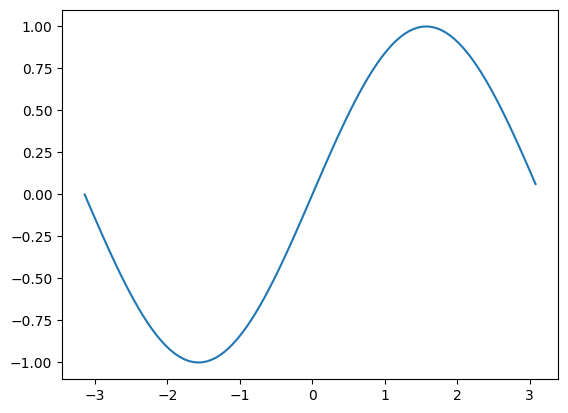

In [7]:
import matplotlib.pyplot as plt
plt.plot(x,y);

For comparison, let's `%%timeit`

In [8]:
%%timeit
y = []
for val in x:
    y.append(sin(val))

5.3 μs ± 34.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [9]:
%%timeit
y = [sin(val) for val in x]

4.98 μs ± 38.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Exercise 2 - Compute the Derivative of $sin\left(x\right)$

$
\begin{align}
\frac{dy}{dx} & \approx\frac{\Delta y}{\Delta x} \\
\frac{\Delta y}{\Delta x}\bigg|_i & =\frac{y_{i+1}-y_{i}}{x_{i+1}-x_{i}} \ \ \textrm{for} \ i=0 \dots \ n-1 \\
\end{align}
$

In [10]:
# your code here
# dy_dx = []
# ...

#### Solution (expand to reveal)

In [11]:
import matplotlib.pyplot as plt

dy_dx = []
for i in range(NUM_POINTS - 1):
    dy = y[i + 1] - y[i]
    dx = x[i + 1] - x[i]
    dy_dx.append(dy / dx)

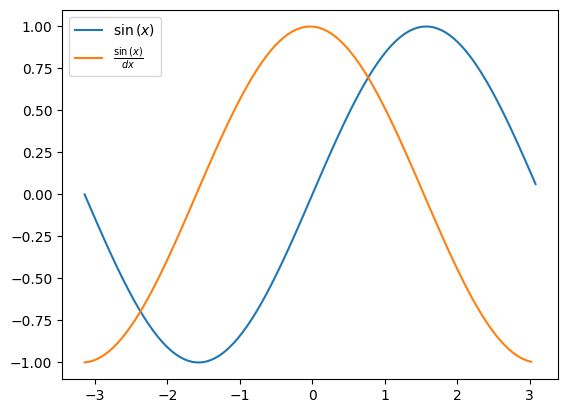

In [12]:
plt.plot(x, y, label=r'$\sin\left(x\right)$')
plt.plot(x[:-1], dy_dx, label=r'$\frac{\sin\left(x\right)}{dx}$')
plt.legend();

In [13]:
%%timeit
dy_dx = []
for i in range(NUM_POINTS - 1):
    dy = y[i + 1] - y[i]
    dx = x[i + 1] - x[i]
    dy_dx.append(dy / dx)

12.1 μs ± 175 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


# Meet the NumPy Array

`list`:  `[,]`
- Dynamically typed
- Ordered
- Mutable **values**
- Mutable **length**

`numpy.ndarray`:  `array([,])`
- Statically typed
- Ordered
- Mutable **values**
- Immutable **length**

In [14]:
import numpy as np

a = np.array(range(10))
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
type(a)

numpy.ndarray

Indexing and setting work the same as for a Python `list`.

In [16]:
a[0] = -9
print(a[0])

-9


## Array Creation

### `arange`
`np.arange([start,] stop[, step,], dtype=None)`

Similar to Python's `range()` -> creates an array of values in the range `[start, stop)` with the specific `step` value, but allows **non-integers** for `start`, `stop`, and `step`.  Also, `arange` returns an `np.ndarray`, unlike `range` which returns an _iterator_.

### `linspace`
`np.linspace(start, stop, num=50, dtype=None)`

Creates `num` evenly spaced elements between `start` and `stop` (endpoint inclusive).

In [17]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
np.linspace(-2, 2, 6)

array([-2. , -1.2, -0.4,  0.4,  1.2,  2. ])

### Exercise 3 - Create a NumPy array

Recreate the `list` from Exercise 1 as an `ndarray`.  ($x_0=-\pi$, $x_{100}=\pi$, 101 elements)

In [19]:
# x = 

#### Solution (expand to reveal)

In [20]:
# Solution 1
x = np.linspace(-np.pi, np.pi, 101)

In [21]:
# Solution 2
step = 2 * np.pi / 100
x_2 = np.arange(-np.pi, np.pi + step, step)

In [22]:
# In addition to the math, this is why I prefer np.linspace
x[-1] - np.pi, x_2[-1] - np.pi

(np.float64(0.0), np.float64(8.881784197001252e-15))

## Dtypes

In [23]:
a.dtype

dtype('int64')

In [24]:
a[2] = 5.5
a

array([-9,  1,  5,  3,  4,  5,  6,  7,  8,  9])

In [25]:
b = np.array(range(10), dtype=float)
b.dtype

dtype('float64')

In [26]:
b[2] = 5.5
b

array([0. , 1. , 5.5, 3. , 4. , 5. , 6. , 7. , 8. , 9. ])

## Digression: `printoptions`

In [27]:
np.get_printoptions()

{'edgeitems': 3,
 'threshold': 1000,
 'floatmode': 'maxprec',
 'precision': 8,
 'suppress': False,
 'linewidth': 75,
 'nanstr': 'nan',
 'infstr': 'inf',
 'sign': '-',
 'formatter': None,
 'legacy': False}

In [28]:
np.set_printoptions(
    precision=3,
    linewidth=75,
)

## Computations

Computations in NumPy are _vectorized_, meaning no `for` loops are needed.  In fact, `for` loops are discouraged because they will slow you down.

In [29]:
a + 1

array([-8,  2,  6,  4,  5,  6,  7,  8,  9, 10])

In [30]:
%timeit a + 1

775 ns ± 21.5 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [31]:
%%timeit
for x in a:
    a + 1

9 μs ± 180 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


NumPy comes with lots of functions that are designed to take advantage of the `ndarray` data structure.  These are called "universal functions", or 'ufuncs'.

In [33]:
np.sin(a)

array([-0.412,  0.841, -0.959,  0.141, -0.757, -0.959, -0.279,  0.657,
        0.989,  0.412])

### Exercise 4 - Vectorized functions

- Redo the computations of Exercise 1 using ufuncs.

$y=\sin\left(x\right)$

- Check the speed of the computation using `%timeit`

In [34]:
# Your solution here

#### Solution (expand to reveal)

In [35]:
x = np.linspace(-np.pi, np.pi, 101)
y = np.sin(x)

In [36]:
%%timeit
np.sin(x)

1.12 μs ± 43 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


# Array Shape and Structure

## Dimensions and Axes

## Shape Definition and Manipulation

### Exercise 5 - Load Data from a Text File

In [37]:
# 

#### Solution (expand to reveal)

In [38]:
#

# Slicing and Dicing

## Array Slices are _Views_ of Data

## Fancy Indexing and Mask Arrays

## Broadcasting (Maybe?)

In [39]:
x = np.linspace(-np.pi, np.pi, 1002)
x

array([-3.142, -3.135, -3.129, ...,  3.129,  3.135,  3.142])

In [40]:
x.shape = (-1,1)
x.shape

(1002, 1)

In [41]:
x.T.shape

(1, 1002)

In [42]:
r = np.sqrt(x ** 2 + x.T ** 2)
z = np.sin(2 * r) / r

In [43]:
z.shape

(1002, 1002)

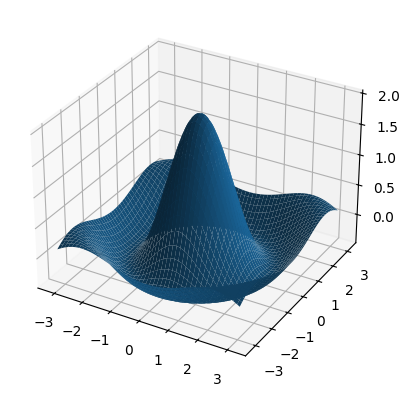

In [44]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(x, x.T, z)

### Exercise 6 - Really make it fast

In [45]:
#

#### Solution (expand to reveal)

In [46]:
# 

# Real-World Data

## Missing Data in NumPy

NumPy uses `np.nan` - "**n**ot **a** **n**umber" to represent missing or invalid data.

## Handling Complex Data Files

## (If Time Allows) - The Structured Array